2. La siguiente tabla muestra los valores estadísticos de cuatro variables que
consideramos para la clasificación de variedades de iris en función de las
características de sus flores. Responde a las siguientes preguntas analizando los
valores de la tabla:

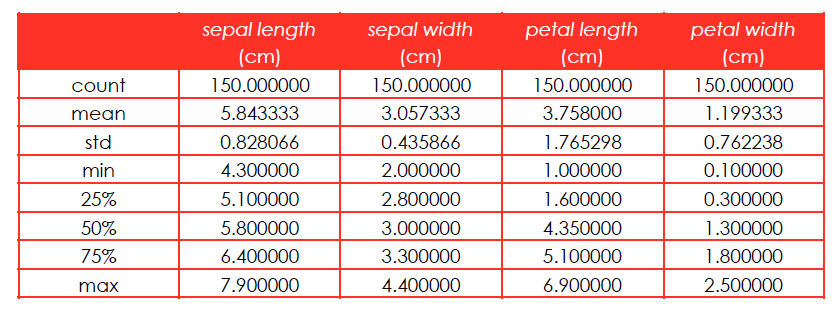

a. ¿De cuántos elementos se compone el dataset?

 El dataset se compone de 150 elementos

b. ¿Cuál es el rango intercuartílico de la longitud del pétalo?

IQR = Q3-Q1 

IQR = 5.100000 - 1.600000 = 3.49

c. Responde “Verdadero” o “Falso” justificando la respuesta: la media es siempre igual a la mediana.

Falso, podemos observar que la media y la mediana son diferentes en todas las observaciones, siendo en algunos casos superior la media (
"sepal length" y "sepal width") y en otros la mediana ("petal length" y "petal width"). 

d. Responde “Verdadero” o “Falso” justificando la respuesta: la media es siempre superior a la mediana.

Falso, en este caso se observa que la media solo es superior en: "sepal length" y "sepal width".

e. ¿Cuál es la variable con menor desviación típica? ¿Cuál tiene menor desviación típica comparado con su media?

La variable con menor desviación típica es: "sepal width"

La variable con menor desviación típica comparado con su media es: "petal width" ya que el valor máximo y mínimo se encuentran más cerca de la media.

f. Responde “Verdadero” o “Falso” justificando la respuesta: como medida de dispersión de datos, a mayor rango de una variable, corresponde siempre mayor desviación típica.

rango = max - min

rango_s_l = 7.900000 - 4.300000 = 3.6 ---  std = 0.828066

rango_s_w = 4.400000 - 2.000000 = 2.4 ---  std = 0.435866

rango_p_l = 6.900000 - 1.000000 = 5.9 ---  std = 1.765298

rango_p_w = 2.500000 - 0.100000 = 2.4 ---  std = 0.762238

Falso, podemos observar que el rango de "sepal width"  y "petal width" son iguales, mientras que la desviación típica de "petal width" es mayor que la de "sepal width", por lo tanto, no se puede afirmar que a mayor rango de una variable siempre corresponde una mayor desviación típica. 


# Ejercicio 3

In [327]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from scipy.stats import boxcox
import scipy.stats as stats

In [300]:
df_house  = pd.read_csv("housing.csv",  skipinitialspace = True)

In [301]:
df_house.drop("ocean_proximity", axis=1, inplace=True)
df_house.dropna(inplace = True)

In [302]:
y_house = df_house["median_house_value"].tolist()
df_house.drop("median_house_value", axis=1, inplace=True)
df_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


a. Utiliza el método describe() de Pandas para obtener un resumen de las
estadísticas de las variables del DataFrame df_house. En base a los valores
de mediana, percentil 25 y percentil 75, ¿qué variables crees que siguen una
distribución distinta a la distribución normal?

In [303]:
df_house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


Variables
- longitude.
- latitude.
- housing_median_age.
- total_rooms.
- total_bedrooms.
- population.
- households.
- median_income.

b. Dibuja los histogramas de cada una de las variables del dataset. ¿Coincide
la predicción que has hecho basada en los percentiles con los resultados
gráficos que has obtenido con los histogramas? Algunos algoritmos de
Machine Learning funcionan mejor cuando sus variables predictivas siguen
una distribución normal. ¿Qué tipos de algoritmos crees que tienen este
requerimiento? ¿Qué tipo de transformaciones puedes aplicar a las variables
de este dataset para que las variables nuevas sigan, aproximadamente, una
distribución normal?

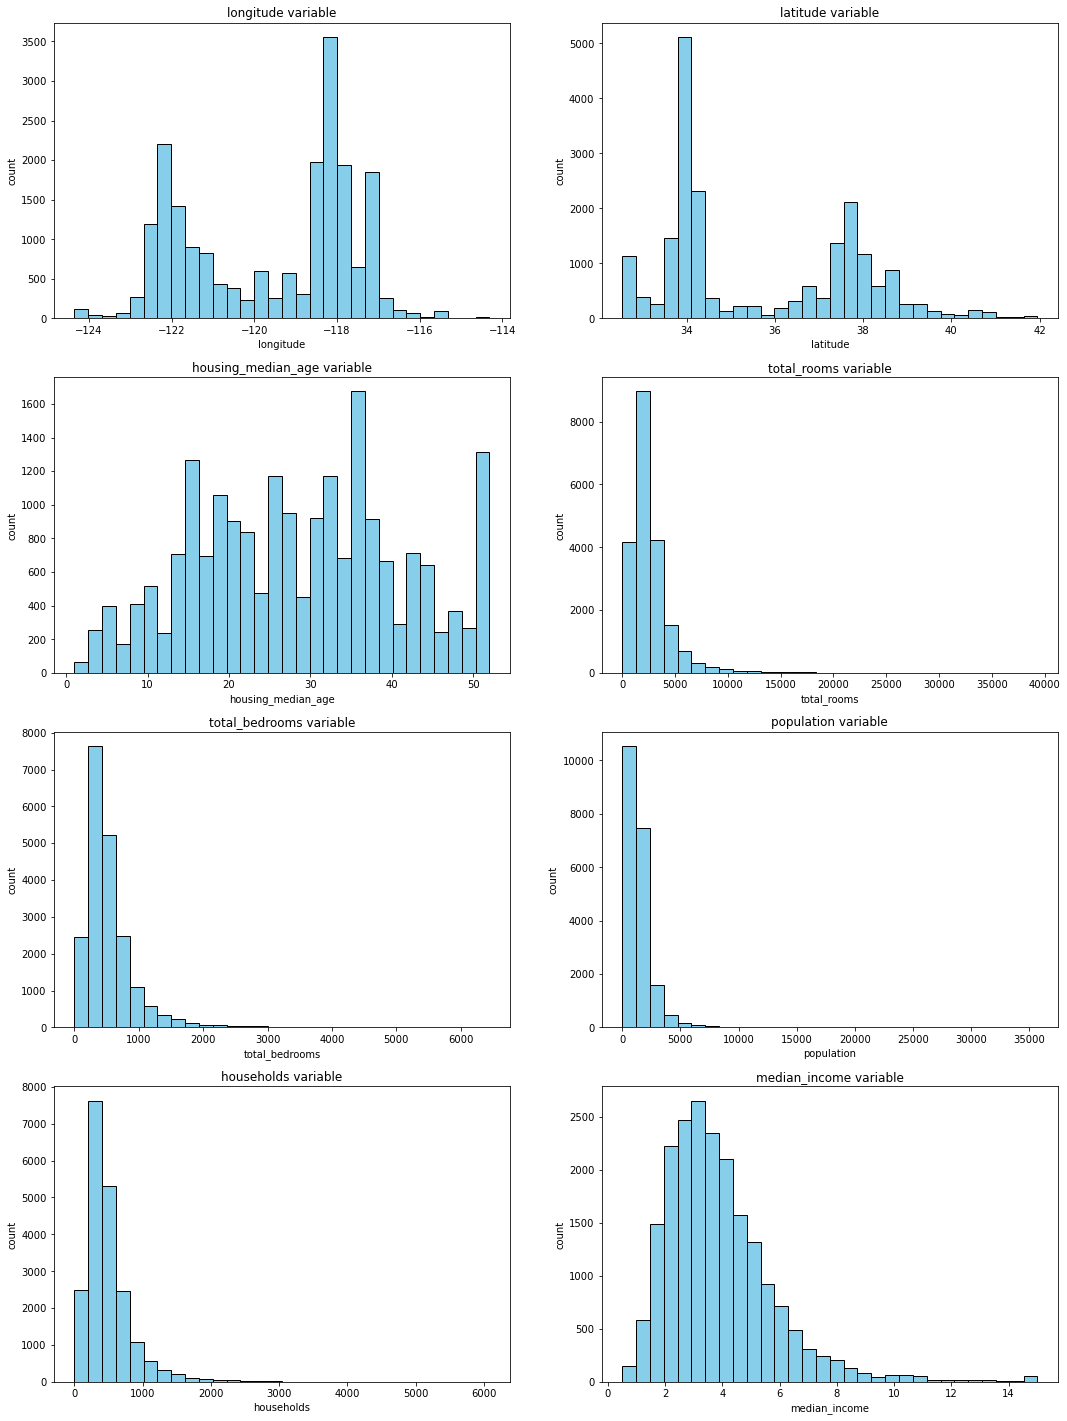

In [304]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(18,25))


ax1.set_title("longitude variable")
ax1.hist(df_house["longitude"], bins=30, color='skyblue', edgecolor='black')
ax1.set_xlabel("longitude")
ax1.set_ylabel("count")


ax2.set_title("latitude variable")
ax2.hist(df_house["latitude"], bins=30, color='skyblue', edgecolor='black')
ax2.set_xlabel("latitude")
ax2.set_ylabel("count")
    

ax3.set_title("housing_median_age variable")
ax3.hist(df_house["housing_median_age"], bins=30, color='skyblue', edgecolor='black')
ax3.set_xlabel("housing_median_age")
ax3.set_ylabel("count")
    
ax4.set_title("total_rooms variable")
ax4.hist(df_house["total_rooms"], bins=30, color='skyblue', edgecolor='black')
ax4.set_xlabel("total_rooms")
ax4.set_ylabel("count")

ax5.set_title("total_bedrooms variable")
ax5.hist(df_house["total_bedrooms"], bins=30, color='skyblue', edgecolor='black')
ax5.set_xlabel("total_bedrooms")
ax5.set_ylabel("count")

ax6.set_title("population variable")
ax6.hist(df_house["population"], bins=30, color='skyblue', edgecolor='black')
ax6.set_xlabel("population")
ax6.set_ylabel("count")

ax7.set_title("households variable")
ax7.hist(df_house["households"], bins=30, color='skyblue', edgecolor='black')
ax7.set_xlabel("households")
ax7.set_ylabel("count")

ax8.set_title("median_income variable")
ax8.hist(df_house["median_income"], bins=30, color='skyblue', edgecolor='black')
ax8.set_xlabel("median_income")
ax8.set_ylabel("count")

plt.show()

c. Dibuja el qq-plot para cada una de las variables del dataset, donde cada
variable ha sido normalizada de forma que tiene media cero y varianza uno.
¿Cómo podemos distinguir las variables que siguen distribuciones normales
de las que no las siguen utilizando este tipo de gráficos? ¿Qué variables no
siguen una distribución normal de acuerdo a los gráficos qq-plot que has
dibujado?

In [305]:
scaler = StandardScaler()
columns_name = df_house.columns
df_house[columns_name] = scaler.fit_transform(df_house[columns_name])
df_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143
...,...,...,...,...,...,...,...,...
20635,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727
20636,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044
20637,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171
20638,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136


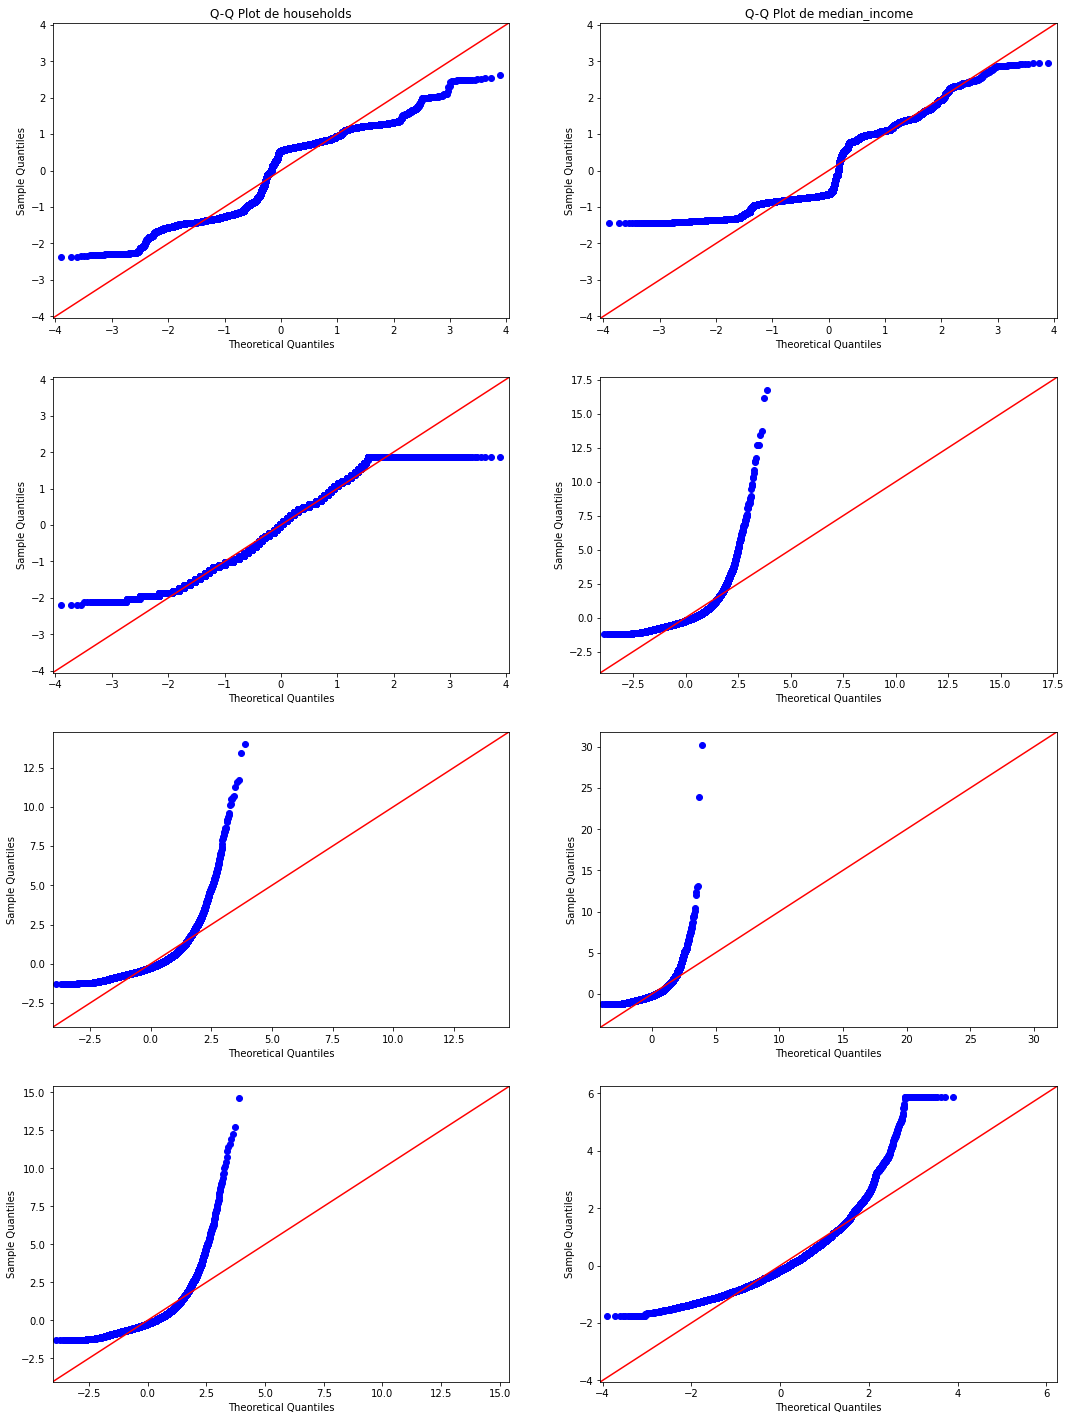

In [306]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(18,25))

sm.qqplot(df_house["longitude"], line='45', ax=ax1)
ax1.set_title('Q-Q Plot de longitude')
sm.qqplot(df_house['latitude'], line='45', ax=ax2)
ax2.set_title('Q-Q Plot de latitude')
sm.qqplot(df_house["housing_median_age"], line='45', ax=ax3)
ax1.set_title('Q-Q Plot de housing_median_age')
sm.qqplot(df_house['total_rooms'], line='45', ax=ax4)
ax1.set_title('Q-Q Plot de total_rooms')
sm.qqplot(df_house["total_bedrooms"], line='45', ax=ax5)
ax1.set_title('Q-Q Plot de total_bedrooms')
sm.qqplot(df_house['population'], line='45', ax=ax6)
ax1.set_title('Q-Q Plot de population')
sm.qqplot(df_house["households"], line='45', ax=ax7)
ax1.set_title('Q-Q Plot de households')
sm.qqplot(df_house['median_income'], line='45', ax=ax8)
ax2.set_title('Q-Q Plot de median_income')
plt.show()

d. Crea un DataFrame nuevo, llamado df_trans, donde las variables originales
han sido transformadas de forma que cada una de ellas sigue,
aproximadamente, una distribución normal. Para ello utiliza, cuando sea
posible, una transformación de Box-Cox. De acuerdo al parámetro de la
transformación para cada variable ¿cuál sería, aproximadamente, la
transformación que sufren cada una de ellas (logaritmo, raíz cuadrada, …)?
Nombra las variables de df_trans como las variables del df original,
añadiendo el sufijo “_trans”.

In [307]:
df_trans = pd.DataFrame()
for x in df_house.columns:
    if df_house[x].min()<=0:
        n , lmb = stats.yeojohnson(df_house[x])
        print("Aplico transformación Yeo-Johson a {}".format(x))
        print("Lambda de {}  = {}".format(x, lmb))
        df_trans[x+"_trans"] = n
    else:
        n , lmb = stats.boxcox(df_house[x])
        print("Aplico transformación Box-Cox a {}".format(x))
        print("Lambda de {}  = {}".format(x, lmb))
        df_trans[x+"_trans"] = n

Aplico transformación Yeo-Johson a longitude
Lambda de longitude  = 1.3839936886423108
Aplico transformación Yeo-Johson a latitude
Lambda de latitude  = 0.4429425949406085
Aplico transformación Yeo-Johson a housing_median_age
Lambda de housing_median_age  = 0.9559150322164539
Aplico transformación Yeo-Johson a total_rooms
Lambda de total_rooms  = -0.18933666095368964
Aplico transformación Yeo-Johson a total_bedrooms
Lambda de total_bedrooms  = -0.13843328720533557
Aplico transformación Yeo-Johson a population
Lambda de population  = -0.11541299576239501
Aplico transformación Yeo-Johson a households
Lambda de households  = -0.08791282398768065
Aplico transformación Yeo-Johson a median_income
Lambda de median_income  = 0.28672973953683806


In [308]:
df_trans

,longitude_trans,latitude_trans,housing_median_age_trans,total_rooms_trans,total_bedrooms_trans,population_trans,households_trans,median_income_trans
0,-1.108131,0.846235,0.965848,-1.205033,-1.526500,-1.518270,-1.508279,1.442922
1,-1.104521,0.839954,-0.613090,1.003191,0.805168,0.599544,0.941006,1.437619
2,-1.111738,0.836807,1.806300,-0.710745,-1.226249,-1.204718,-1.238531,1.189528
3,-1.115342,0.836807,1.806300,-0.862847,-1.021388,-1.099817,-1.031733,0.725444
4,-1.115342,0.836807,1.806300,-0.592284,-0.830521,-1.088197,-0.847596,-0.013204
...,...,...,...,...,...,...,...,...
20428,-0.674885,1.304949,-0.290222,-0.565158,-0.476414,-0.660466,-0.551325,-1.699145
20429,-0.722799,1.307586,-0.857136,-1.378619,-1.420191,-1.454773,-1.574732,-0.853481
20430,-0.726765,1.291731,-0.938804,-0.193457,-0.134483,-0.445692,-0.190285,-1.570907
20431,-0.766191,1.291731,-0.857136,-0.432009,-0.359782,-0.810930,-0.478632,-1.421507


e. Crea un nuevo array y trans a partir del array y_house, de forma que los
elementos de y_trans sigan, aproximadamente, una distribución normal.
Utiliza una transformación de Box-Cox. Representa, para cada variable
transformada, el qq-plot correspondiente. Recuerda que debemos
normalizar la variable de forma que tenga media cero y varianza uno.
¿Siguen las variables transformadas una distribución normal?

<function matplotlib.pyplot.show(*args, **kw)>

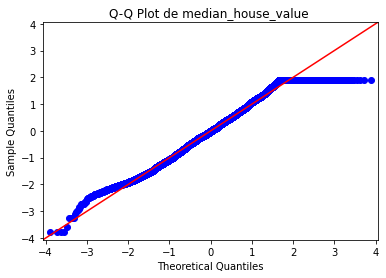

In [309]:
y_trans , lmb_mi = stats.boxcox(y_house)
x_house = ((y_trans - y_trans.mean())/y_trans.std())
sm.qqplot(x_house, line="45")
plt.title('Q-Q Plot de median_house_value ')
plt.show

In [310]:
scaler = StandardScaler()
columns_name = df_trans.columns
df_trans[columns_name] = scaler.fit_transform(df_trans[columns_name])
df_trans

,longitude_trans,latitude_trans,housing_median_age_trans,total_rooms_trans,total_bedrooms_trans,population_trans,households_trans,median_income_trans
0,-1.267131,1.081990,0.982092,-1.345650,-1.717169,-1.744400,-1.673502,1.871853
1,-1.263469,1.075507,-0.597424,1.815557,1.471922,1.187274,1.619552,1.865873
2,-1.270790,1.072260,1.822852,-0.638047,-1.306507,-1.310353,-1.310827,1.586099
3,-1.274446,1.072260,1.822852,-0.855790,-1.026312,-1.165138,-1.032787,1.062747
4,-1.274446,1.072260,1.822852,-0.468462,-0.765258,-1.149053,-0.785216,0.229766
...,...,...,...,...,...,...,...,...
20428,-0.827657,1.555416,-0.274438,-0.429630,-0.280936,-0.556948,-0.386880,-1.671486
20429,-0.876260,1.558137,-0.841560,-1.594150,-1.571767,-1.656502,-1.762848,-0.717822
20430,-0.880283,1.541774,-0.923257,0.102483,0.186733,-0.259638,0.098536,-1.526871
20431,-0.920276,1.541774,-0.841560,-0.239019,-0.121414,-0.765235,-0.289145,-1.358390


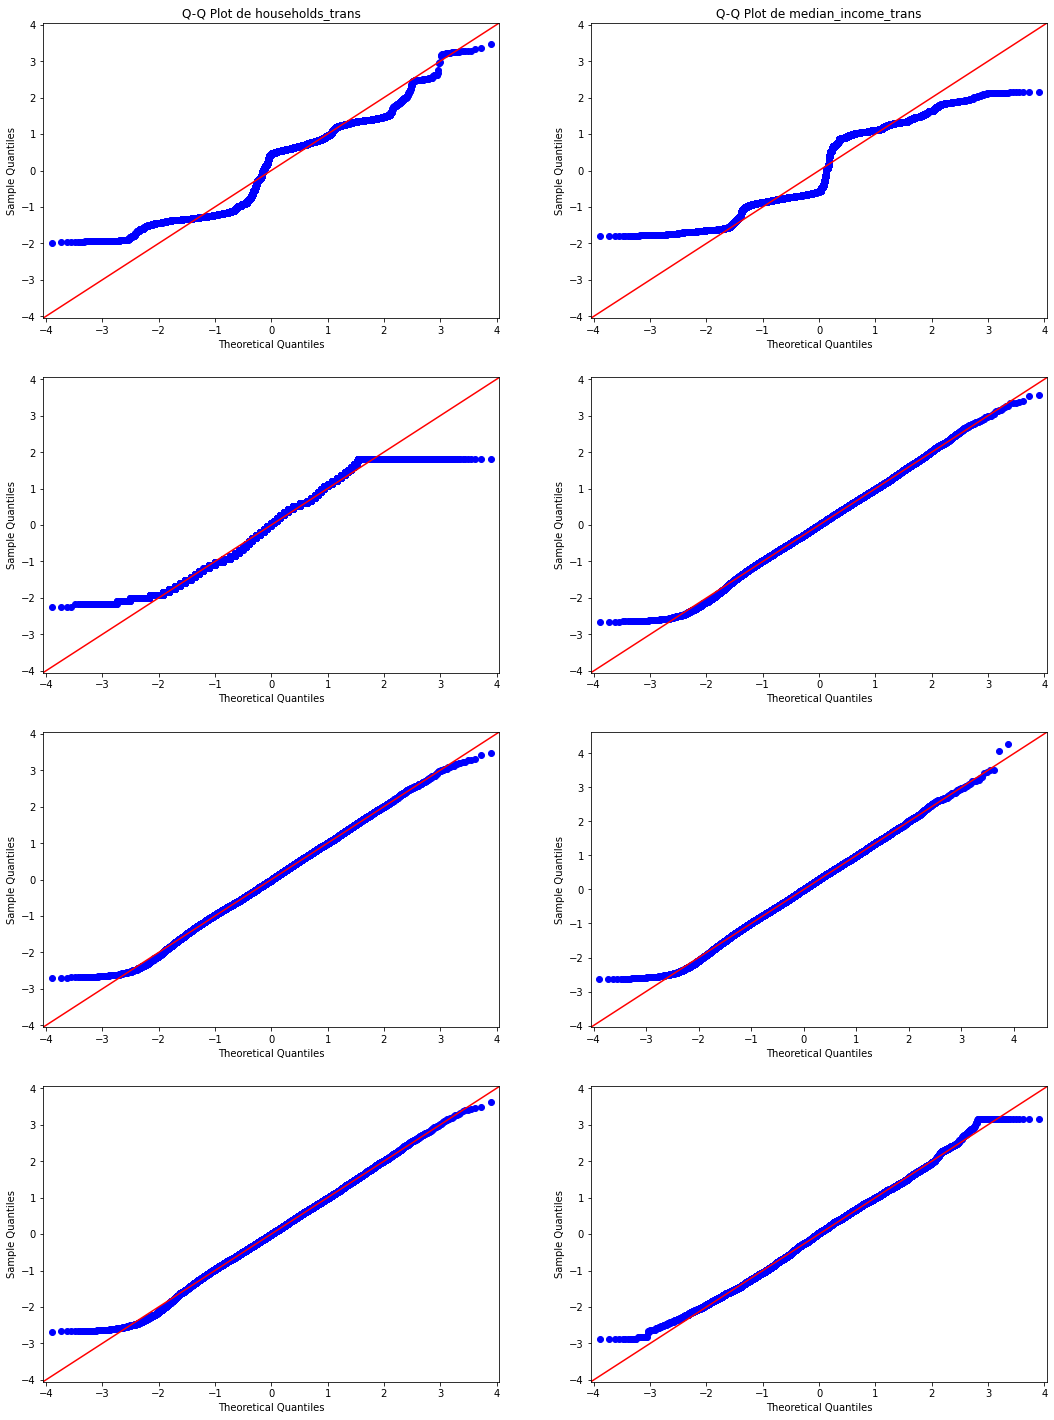

In [311]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(18,25))

sm.qqplot(df_trans["longitude_trans"], line='45', ax=ax1)
ax1.set_title('Q-Q Plot de longitude_trans')
sm.qqplot(df_trans['latitude_trans'], line='45', ax=ax2)
ax2.set_title('Q-Q Plot de latitude_trans')
sm.qqplot(df_trans["housing_median_age_trans"], line='45', ax=ax3)
ax1.set_title('Q-Q Plot de housing_median_age_trans')
sm.qqplot(df_trans['total_rooms_trans'], line='45', ax=ax4)
ax1.set_title('Q-Q Plot de total_rooms_trans')
sm.qqplot(df_trans["total_bedrooms_trans"], line='45', ax=ax5)
ax1.set_title('Q-Q Plot de total_bedrooms_trans')
sm.qqplot(df_trans['population_trans'], line='45', ax=ax6)
ax1.set_title('Q-Q Plot de population_trans')
sm.qqplot(df_trans["households_trans"], line='45', ax=ax7)
ax1.set_title('Q-Q Plot de households_trans')
sm.qqplot(df_trans['median_income_trans'], line='45', ax=ax8)
ax2.set_title('Q-Q Plot de median_income_trans')
plt.show()

# Ejercicio 4

a. Sobre el array y_house, utiliza el método de z-score para señalar las
instancias que muestren valores atípicos. Sobre el array y_trans, utiliza el
método z-score para señalar las instancias que muestren valores atípicos.
¿Coinciden las instancias encontradas en ambos arrays? ¿Cuál crees que
es el motivo?

In [312]:
y_house_zscore = stats.zscore(y_house)
house_outliers =  np.where((np.abs(y_house_zscore)> 3) )[0]
print("Contiene {} outliers".format(house_outliers.size))
print(house_outliers)

Contiene 0 outliers
[]


In [313]:
y_trans_zscore = stats.zscore(y_trans)
trans_outliers = np.where(np.abs(y_trans_zscore)>3)[0]
print("Contiene {} outliers".format(trans_outliers.size))
print(trans_outliers)

Contiene 11 outliers
[ 1814  2502  2757  2777  3003  5825  9096 13760 14190 16028 19608]


b. Realiza un análisis representando gráficamente un gráfico de caja para los
arrays y_house e y_trans. ¿Muestran la misma distribución de valores
atípicos? ¿Cuál crees que es el motivo? Utilizando la definición del gráfico
de cajas obtén las instancias de y_house e y_trans que muestren valores
atípicos. ¿Son las mismas que las obtenidas en el apartado anterior?

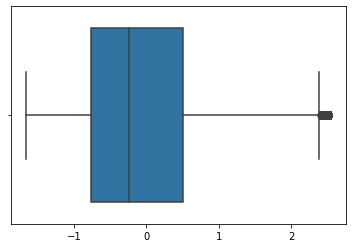

In [314]:
sns.boxplot(x=y_house_zscore)

In [315]:
Q1_house = np.quantile(y_house_zscore, 0.25)
Q3_house = np.quantile(y_house_zscore, 0.75)
IQR_house = Q3_house - Q1_house
house_outliers = np.where(np.abs(y_house_zscore)> ((Q1_house + 1.5) * IQR_house))[0]
print("Contiene {} outliers. ".format(house_outliers.size))
print(house_outliers)

Contiene 6967 outliers. 
[    0     1     2 ... 20430 20431 20432]


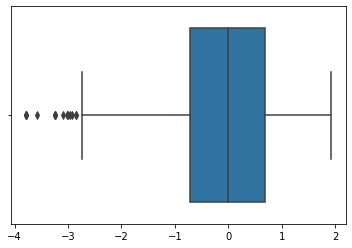

In [316]:
sns.boxplot(x=y_trans_zscore)

In [317]:
Q1_trans = np.quantile(y_trans_zscore, 0.25)
Q3_trans = np.quantile(y_trans_zscore, 0.75)
IQR_trans = Q3_trans - Q1_trans
trans_outliers = np.where(np.abs(y_trans_zscore)> ((Q1_trans + 1.5) * IQR_trans))[0]
print("Contiene {} outliers. ".format(trans_outliers.size))
print(trans_outliers)

Contiene 6166 outliers. 
[    0     1     2 ... 20430 20431 20432]


c. Utiliza la clase LocalOutlierFactor de Scikit Learn para declarar un objeto
llamado lof. Entrena este objeto sobre df_house para encontrar las
instancias que muestren valores atípicos. ¿Cuáles son estas instancias?

In [318]:
lof = LocalOutlierFactor()

In [319]:
array_lof = lof.fit_predict(df_house)
unique, counts = np.unique(array_lof, return_counts=True)

result = np.column_stack((unique, counts))
print(result)

[[   -1   261]
 [    1 20172]]


In [320]:
df_lof = df_house
df_lof["lof"] = array_lof.tolist()

In [321]:
res =df_lof.loc[df_lof['lof'] == -1]
res

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,lof
95,-1.342287,1.014269,0.585070,1.232142,4.601912,1.803819,4.770115,-0.980159,-1
460,-1.342287,1.047036,1.855769,-0.709085,-0.396015,1.687333,-0.390890,-1.300497,-1
1039,-0.698423,1.304491,-1.003304,-0.406598,-0.512301,3.093110,-0.555687,0.227321,-1
1067,-1.137648,1.917702,1.855769,-1.003335,-1.086611,-0.280579,-1.050076,-0.238022,-1
1566,-1.192552,0.986183,-2.115165,-1.114995,-1.229002,-1.235414,-1.282884,5.859665,-1
...,...,...,...,...,...,...,...,...,...
20287,0.199991,-0.684934,1.061582,-0.560816,-0.564511,-0.114675,-0.419664,-0.634179,-1
20297,0.175035,-0.694296,0.267395,0.235902,0.137952,1.822351,0.069493,-0.603483,-1
20324,0.224947,-0.647486,0.187977,-0.869252,-0.929981,0.009754,-0.866969,-0.162518,-1
20349,0.244912,-0.684934,0.267395,-1.130554,-1.224256,-1.201880,-1.230567,1.805580,-1


d. Entrena el objeto lof sobre df_trans para encontrar las instancias que
muestren valores atípicos. ¿Son las mismas instancias que en el apartado
anterior?

In [323]:
lof_trans = LocalOutlierFactor()

In [324]:
array_lof_trans = lof_trans.fit_predict(df_trans)
unique, counts = np.unique(array_lof_trans, return_counts=True)

result = np.column_stack((unique, counts))
print(result)

[[   -1   208]
 [    1 20225]]


In [325]:
df_lof_trans = df_trans
df_lof_trans["lof"] = array_lof_trans.tolist()

In [326]:
res_trans =df_lof_trans.loc[df_lof_trans['lof'] == -1]
res_trans

,longitude_trans,latitude_trans,housing_median_age_trans,total_rooms_trans,total_bedrooms_trans,population_trans,households_trans,median_income_trans,lof
91,-1.285396,1.055959,1.822852,-2.313402,-2.020733,-0.444856,-1.961690,-2.440049,-1
270,-1.248791,1.049409,0.360452,-2.430605,-2.452117,-1.126184,-2.289915,0.246934,-1
457,-1.274446,1.078751,1.822852,-1.718435,-1.020304,0.261077,-0.839458,-2.094219,-1
458,-1.278099,1.078751,1.822852,-1.080647,-0.295131,1.650593,-0.284104,-1.840400,-1
1033,-0.778414,1.251161,-1.005104,-0.346732,-0.538726,2.157826,-0.621867,0.482568,-1
...,...,...,...,...,...,...,...,...,...
20017,0.018771,-0.551602,0.982092,-0.262650,-0.596467,-0.887354,-0.504710,0.763420,-1
20093,0.040246,-0.635001,0.281936,0.676634,0.545850,1.710965,0.444437,-0.575217,-1
20114,0.078165,-0.602724,-0.274438,0.816915,1.180400,2.306129,1.278618,-0.279372,-1
20120,0.094546,-0.570697,0.203203,-1.538687,-1.599136,0.370759,-1.372827,0.050918,-1


e. Utiliza la clase IsolationForest para crear un objeto llamado isf. Entrena este
objeto sobre df_house para encontrar las instancias que muestren valores
atípicos. ¿Son las mismas instancias que en el apartado c? Repite el
proceso entrenando sobre df_trans, ¿obtienes las mismas instancias que las
que obtuviste en el apartado d?

In [328]:
iso_house = IsolationForest()

In [329]:
array_iso_house = iso_house.fit_predict(df_house)
unique, counts = np.unique(array_iso_house, return_counts=True)

result = np.column_stack((unique, counts))
print(result)

[[   -1  2212]
 [    1 18221]]


In [330]:
df_iso_house = df_house
df_iso_house["lof"] = array_iso_house.tolist()

In [331]:
res_house =df_iso_house.loc[df_iso_house['lof'] == -1]
res_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,lof
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,-1
59,-1.357261,1.023631,-2.115165,-1.134215,-1.174419,-1.174523,-1.157325,-0.689043,-1
61,-1.357261,1.023631,1.617513,-1.144740,-1.207644,-1.181583,-1.246262,1.183175,-1
73,-1.357261,1.018950,1.379257,-1.201027,-1.266973,-1.241591,-1.288115,-1.775054,-1
81,-1.347279,1.018950,1.855769,-1.110418,-1.143568,-1.095983,-1.159940,-1.423967,-1
...,...,...,...,...,...,...,...,...,...
20592,-1.002886,1.641523,1.855769,-0.903574,-0.896756,-0.798590,-0.916670,-1.568182,-1
20620,-0.952974,1.599394,0.902745,-1.115910,-1.179165,-1.124222,-1.180867,0.364007,-1
20625,-0.972939,1.632161,0.664489,-1.159841,-1.236122,-1.231884,-1.269805,0.133652,-1
20627,-0.873115,1.636842,-1.876909,-1.042691,-1.122209,-1.108338,-1.152093,-0.458688,-1


In [332]:
iso_trans = IsolationForest()

In [333]:
array_iso_trans = iso_trans.fit_predict(df_trans)
unique, counts = np.unique(array_iso_trans, return_counts=True)

result = np.column_stack((unique, counts))
print(result)

[[   -1  3186]
 [    1 17247]]


In [334]:
df_iso_trans = df_trans
df_iso_trans["lof"] = array_iso_trans.tolist()

In [335]:
res_trans =df_iso_trans.loc[df_iso_trans['lof'] == -1]
res_trans

,longitude_trans,latitude_trans,housing_median_age_trans,total_rooms_trans,total_bedrooms_trans,population_trans,households_trans,median_income_trans,lof
0,-1.267131,1.081990,0.982092,-1.345650,-1.717169,-1.744400,-1.673502,1.871853,-1
1,-1.263469,1.075507,-0.597424,1.815557,1.471922,1.187274,1.619552,1.865873,-1
20,-1.281749,1.072260,0.904936,-1.519427,-1.345321,-1.522477,-1.386722,-1.887251,-1
25,-1.285396,1.072260,0.982092,-1.825367,-1.759493,-1.757453,-1.725434,-0.852256,-1
29,-1.285396,1.069008,1.822852,-1.549728,-1.504016,-1.557526,-1.463896,-1.539669,-1
...,...,...,...,...,...,...,...,...,...
20413,-0.983423,1.435933,0.904936,-2.340500,-2.372841,-2.209323,-2.281696,0.610780,-1
20418,-0.999054,1.455727,0.672588,-2.495756,-2.564746,-2.564447,-2.567182,0.388697,-1
20420,-0.920276,1.458543,-1.913875,-2.090148,-2.186563,-2.158583,-2.191988,-0.353973,-1
20422,-0.948027,1.455727,-0.034463,2.225392,2.131435,2.567940,2.235207,-1.137684,-1
